# Import

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

In [64]:
mc = pd.read_csv("marketing_campaign.csv", sep='\t')
mc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Check data

In [65]:
# Check data size
print(f"{mc.shape[0]} rows, {mc.shape[1]} columns")

2240 rows, 29 columns


In [66]:
# Value type
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [67]:
# Check null
mc.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [68]:
## Check duplicates
mc.duplicated().sum()

0

# Data Preparation

## Customer basic infomation

### Clean `Income`

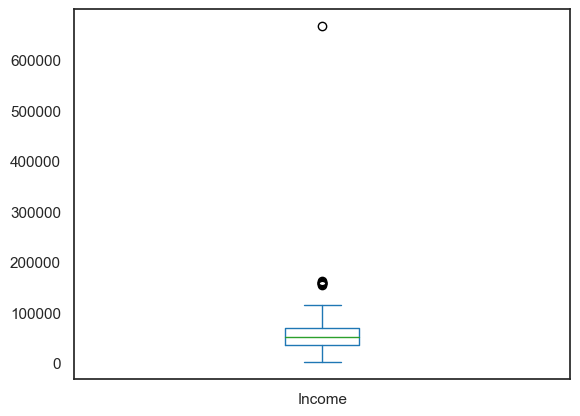

In [69]:
mc['Income'].plot.box()
plt.show()
# Income has some outliers,
# however there are 1 outliers that extremely out of data range and the number also unreliable
# --> Drop the row.

In [70]:
# column 'Income' has null values -- fill in values by the median of Income
mc = mc.fillna(mc['Income'].median())

# Drop the outliers in Income
mc = mc[mc['Income'] < 200000]

### Clean `Dt_Customer`

In [71]:
mc['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2239 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype 
--------------  ----- 
2239 non-null   object
dtypes: object(1)
memory usage: 35.0+ KB


In [72]:
# date column 'Dt_Customer' is not in datatime datatype -- change datatype
mc['Dt_Customer'] = pd.to_datetime(mc['Dt_Customer'], dayfirst = True)

### Clean `Year_Birth`

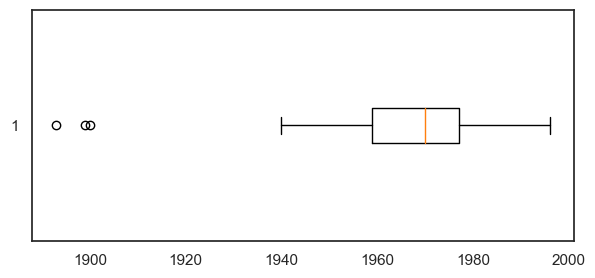

In [73]:
plt.figure(figsize=(7, 3))
plt.boxplot(mc['Year_Birth'], vert=False)

plt.show()

In [74]:
# considering that the data were incorrectly fill -- change to the median data
mc.loc[mc['Year_Birth'] <= 1900, 'Year_Birth'] = int(mc['Year_Birth'].median())

### Define `Age group`

Because we cannot define the last day of the dataset, so it is assumed that:
- last_day = max(Dt_customer + Recency)

In [75]:
# Calculate last day
last_date = mc.apply(lambda row: row['Dt_Customer'] + pd.DateOffset(days=row['Recency']), axis=1).max()
print(last_date)

2014-10-04 00:00:00


We let's check how long customer has been with us
- lifespan_months = (last_date - Dt_Customer) / 30

In [76]:
mc['lifespan_months'] = (last_date - mc['Dt_Customer']).dt.days // 30

In [77]:
mc['Age'] = 2014 - mc['Year_Birth']

In [78]:
print(min(mc['Age']))
print(max(mc['Age']))

18
74


In [79]:
bins = [0, 18, 30, 45, 100]
labels = ['Children', 'Young-adult', 'Adult', 'Senior']
mc['Age group'] = pd.cut(mc['Age'], bins=bins, labels=labels, right=False)

### Clean `Education`

In [80]:
mc['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Education can be grouped into: `Undergraduate` and `Postgraduate`

In [81]:
# Resize Education by 2 groups: Undergraduate and Postgraduate
edu_clean = {
    'Graduation': 'Postgraduate'
    , 'PhD'     : 'Postgraduate'
    , 'Master'  : 'Postgraduate'
    , 'Basic'   : 'Undergraduate'
    , '2n Cycle': 'Undergraduate'
}

mc['Education_clean'] = mc['Education'].replace(edu_clean)
mc['Education_clean'].value_counts()

Postgraduate     1982
Undergraduate     257
Name: Education_clean, dtype: int64

## Customer Family data

### Clean `Marital_Status`

In [82]:
mc['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Martial status dont need to have that much categories, we can just combine them into `Single` and `Couple`

In [83]:
# Resize Marital by 2 groups: Couple and Single
marital_clean = {
      'Together'  : 'Couple'
    , 'Married'   : 'Couple'
    , 'Divorced'  : 'Single'
    , 'Widow'     : 'Single'
    , 'Alone'     : 'Single'
    , 'Absurd'    : 'Single'
    , 'YOLO'      : 'Single'
}

mc['Marital_clean'] = mc['Marital_Status'].replace(marital_clean)
mc['Marital_clean'].value_counts()

Couple    1443
Single     796
Name: Marital_clean, dtype: int64

### Define `Children`

We can comebine `Kidhome` and `Teenhome` and define as number of `Children`

In [84]:
# Children column
mc['Children'] = mc['Kidhome'] + mc['Teenhome']
mc['Children'].value_counts()

1    1127
0     638
2     421
3      53
Name: Children, dtype: int64

### Define `Family size`

`Family_size` is assumed to be customer's status (1 if Single, 2 if Couple) + number of `Children`

In [85]:
mc['Family_size'] = mc['Marital_Status'].apply(lambda x: 1 if x == 'Single' else 2) + mc['Children']
mc['Family_size'].value_counts()

3    976
2    695
4    364
1    167
5     37
Name: Family_size, dtype: int64

## Customer marketing data

### Define `Promotion accepted`

In [86]:
mc['Promotion accepted'] = mc[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis = 1)
mc['Promotion accepted'].value_counts()

0    1630
1     370
2     142
3      51
4      36
5      10
Name: Promotion accepted, dtype: int64

### Define `Responder` column

In [87]:
mc[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].head(3)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0


There are 6 columns on Customer accepted the offer in the promotion campaign. We can combine them together, then segment as below:
- Accepted 4 to 6 offers: High responder
- Accepted 1 to 3 offers: Low responder
- Not accepted any offers: Non-responder

In [88]:
# Calculate sum promotion accepted
mc['PromoAccepted'] = mc[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

# Responder segments
mc['Responder'] = 'None'
mc.loc[mc['PromoAccepted'].between(1,3), 'Responder'] = 'Low'
mc.loc[mc['PromoAccepted'] >= 4, 'Responder'] = 'High'

## RFM data

### Recency

In [89]:
mc['Recency'].head()

0    58
1    38
2    26
3    26
4    94
Name: Recency, dtype: int64

### Frequency

In [90]:
mc[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].head(3)

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10


We can comebine the times people made purchases through `Web`, `Catalog`, `Store` into one column `Frequency`

In [91]:
mc['Frequency'] = mc[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

### Monetary

In [92]:
mc['Monetary'] = mc[["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)

## Split data and Rename columns

In [93]:
# Split data for easy maintainance in Power BI
customer_data = mc[['ID', 'Age','Education','Marital_Status','Children','Family_size','Income','lifespan_months']].copy()
rfm_data = mc[['ID','Recency','Frequency','Monetary']].copy()
marketing_data = mc[['ID','NumDealsPurchases','PromoAccepted','Responder']].copy()

In [94]:
# Change name columns
new_name = {  'MntWines'            : 'Wines'
            , 'MntFruits'           : 'Fruits'
            , 'MntMeatProducts'     : 'Meat'
            , 'MntFishProducts'     : 'Fish'
            , 'MntSweetProducts'    : 'Sweet'
            , 'MntGoldProds'        : 'Gold'
            , 'NumDealsPurchases'   : 'Deals'
            , 'NumWebPurchases'     : 'Web'
            , 'NumCatalogPurchases' : 'Catalog'
            , 'NumStorePurchases'   : 'Store'
            , 'NumWebVisitsMonth'   : 'Web Visit'
            , 'Dt_Customer'         : 'Enrollment date'}

mc = mc.rename(columns=new_name)
mc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Enrollment date', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweet', 'Gold', 'Deals', 'Web', 'Catalog', 'Store',
       'Web Visit', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'lifespan_months', 'Age', 'Age group',
       'Education_clean', 'Marital_clean', 'Children', 'Family_size',
       'Promotion accepted', 'PromoAccepted', 'Responder', 'Frequency',
       'Monetary'],
      dtype='object')

# RFM modeling

From `rfm_data` we need to add score for each values. The method using here will be:
- Define score for `Recency`, `Frequency` and `Monetary` from 1 to 5
- Each score is the evenly separated range for each columns
- Based on `Recency_score` and `Frequency_score`, the results are defined below

| Segment           	| Frequency_score 	| Recency_score 	|
|--------------------	|:---------------:	|---------------	|
| New Customer       	| 1               	| 1             	|
| Potential Loyalist 	| 2 or 3          	| 1             	|
| Loyal customer     	| 4               	| 1             	|
| About to sleep     	| 1               	| 2 or 3        	|
| Need attention     	| 2 or 3          	| 2 or 3        	|
| Can't lose them    	| 4               	| 2 or 3        	|
| Lost customer        	| 1               	| 4             	|
| Hibernating       	| 2 or 3          	| 4             	|
| Once loyal         	| 4               	| 4             	|

In [95]:
rfm_data

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2235,10870,46,16,1341
2236,4001,56,15,444
2237,7270,91,18,1241
2238,8235,8,21,843


## RFM score

In [96]:
# The lower the recency the better
rfm_data['Recency_score'] = pd.qcut(rfm_data['Recency'], q = 4, labels=[4,3,2,1])

# The higher the frequency and monetary the better
rfm_data['Frequency_score'] = pd.qcut(rfm_data['Frequency'], q = 4, labels=[1,2,3,4])
rfm_data['Monetary_score'] = pd.qcut(rfm_data['Monetary'], q = 4, labels=[1,2,3,4])

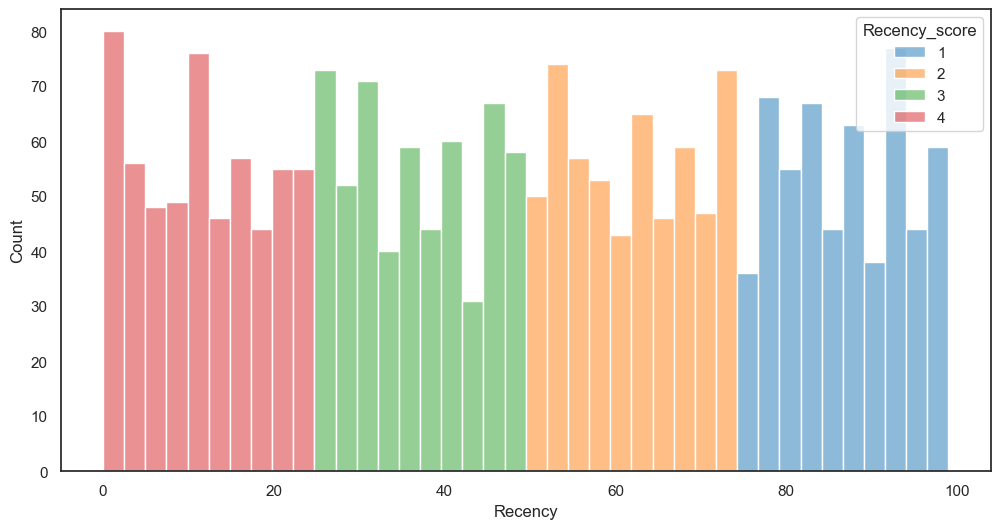

In [97]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.set_style("white")
sns.set_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
sns.histplot(data=rfm_data, x='Recency', bins=40, hue='Recency_score', multiple='layer', hue_order=[1,2,3,4])
plt.show()

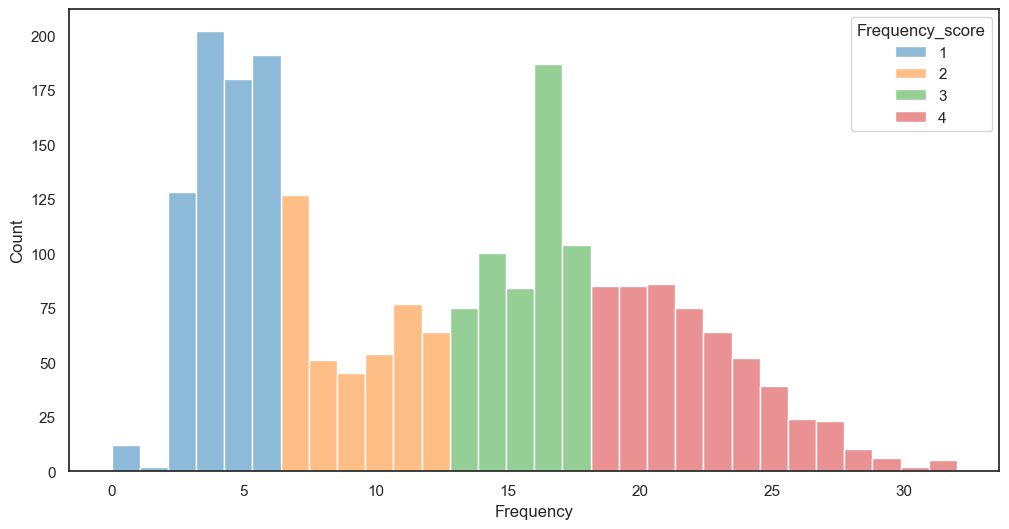

In [98]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.set_style("white")
sns.set_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
sns.histplot(data=rfm_data, x='Frequency', bins=30, hue='Frequency_score', multiple='layer', hue_order=[1,2,3,4])
plt.show()

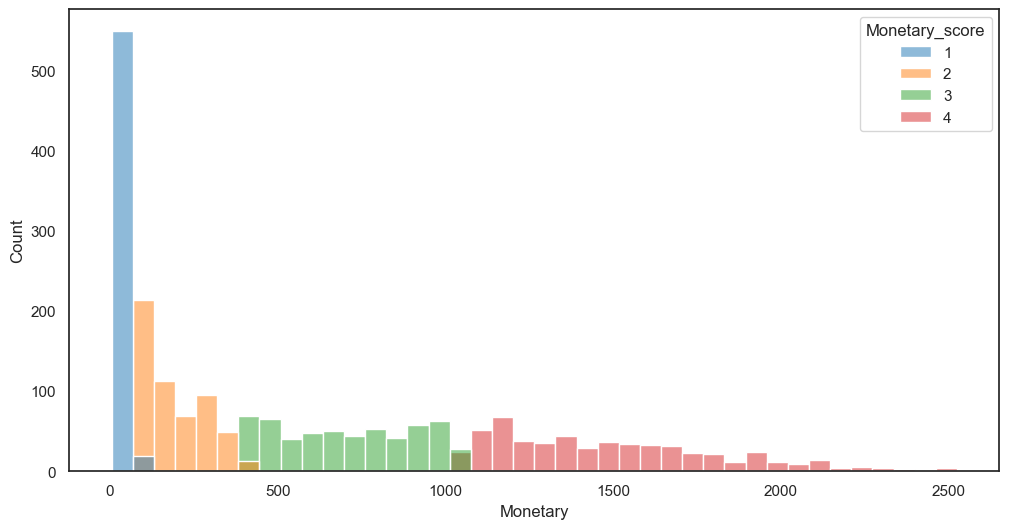

In [99]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.set_style("white")
sns.set_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
sns.histplot(data=rfm_data, x='Monetary', bins=40, hue='Monetary_score', multiple='layer', hue_order=[1,2,3,4])
plt.show()

## Customer Segmentation

In [100]:
# RMF segments
rfm_data['Segment'] = "Non-defined"
rfm_data.loc[(rfm_data['Frequency_score'] == 1)         & (rfm_data['Recency_score'] == 1),         'Segment'] = "New Customer"
rfm_data.loc[(rfm_data['Frequency_score'].isin([2,3]))  & (rfm_data['Recency_score'] == 1),         'Segment'] = "Potential Loyalist"
rfm_data.loc[(rfm_data['Frequency_score'] == 4)         & (rfm_data['Recency_score'] == 1),         'Segment'] = "Loyal customer"

rfm_data.loc[(rfm_data['Frequency_score'] == 1)         & (rfm_data['Recency_score'].isin([2,3])),  'Segment'] = "About to sleep"
rfm_data.loc[(rfm_data['Frequency_score'].isin([2,3]))  & (rfm_data['Recency_score'].isin([2,3])),  'Segment'] = "Need attention"
rfm_data.loc[(rfm_data['Frequency_score'] == 4)         & (rfm_data['Recency_score'].isin([2,3])),  'Segment'] = "Can't lose them"

rfm_data.loc[(rfm_data['Frequency_score'] == 1)         & (rfm_data['Recency_score'] == 4),         'Segment'] = "Lost customer"
rfm_data.loc[(rfm_data['Frequency_score'].isin([2,3]))  & (rfm_data['Recency_score'] == 4),         'Segment'] = "Hibernating"
rfm_data.loc[(rfm_data['Frequency_score'] == 4)         & (rfm_data['Recency_score'] == 4),         'Segment'] = "Once loyal"

## EDA RFM

In [101]:
rfm_update_data = rfm_data.merge(mc, how ='left', on='ID')

### Customers

In [102]:
# Check number of customer per segment
rfm_data.groupby('Segment')['ID'].count().reset_index()

,Segment,ID
0,About to sleep,340
1,Can't lose them,270
2,Hibernating,239
3,Lost customer,184
4,Loyal customer,143
5,Need attention,512
6,New Customer,191
7,Once loyal,143
8,Potential Loyalist,217


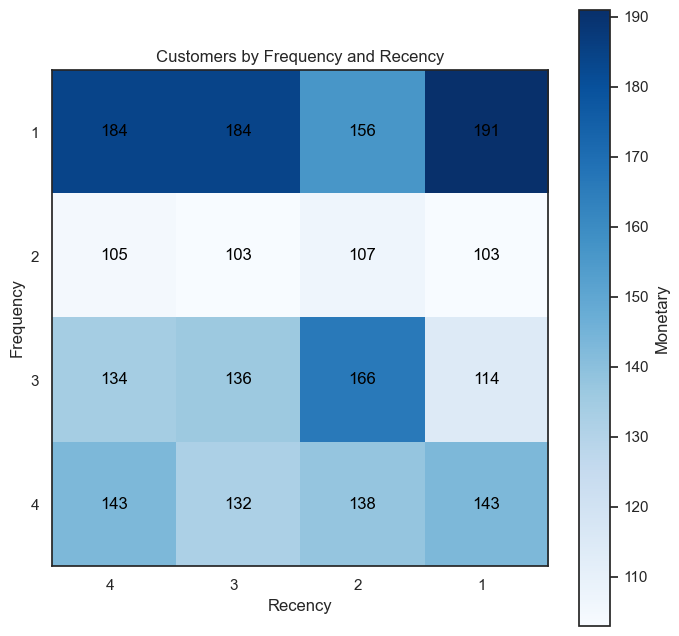

In [103]:
pivot_table = rfm_data.pivot_table(values='Monetary', index='Frequency_score', columns='Recency_score', aggfunc='count')

fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(pivot_table, cmap='Blues')

ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticklabels(pivot_table.index)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')

cbar = plt.colorbar(heatmap)
cbar.set_label('Monetary')

plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, f"{pivot_table.iloc[i, j]:.0f}",
                       ha="center", va="center", color="black")

# Set plot title
plt.title("Customers by Frequency and Recency")

plt.show()


### Money

In [104]:
# Check mean money spent per Segment
rfm_data.groupby('Segment')['Monetary'].mean().reset_index()

,Segment,Monetary
0,About to sleep,55.223529
1,Can't lose them,1269.648148
2,Hibernating,631.556485
3,Lost customer,51.657609
4,Loyal customer,1287.559441
5,Need attention,661.269531
6,New Customer,54.005236
7,Once loyal,1172.664336
8,Potential Loyalist,618.437788


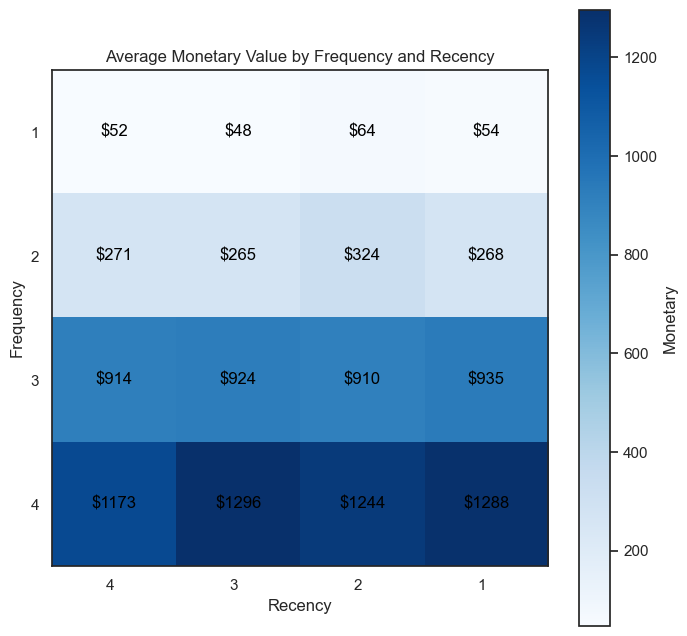

In [105]:
pivot_table = rfm_data.pivot_table(values='Monetary', index='Frequency_score', columns='Recency_score', aggfunc=np.mean)

fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(pivot_table, cmap='Blues')

ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticklabels(pivot_table.index)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')

cbar = plt.colorbar(heatmap)
cbar.set_label('Monetary')

plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, f"${pivot_table.iloc[i, j]:.0f}",
                       ha="center", va="center", color="black")

# Set plot title
plt.title("Average Monetary Value by Frequency and Recency")

plt.show()


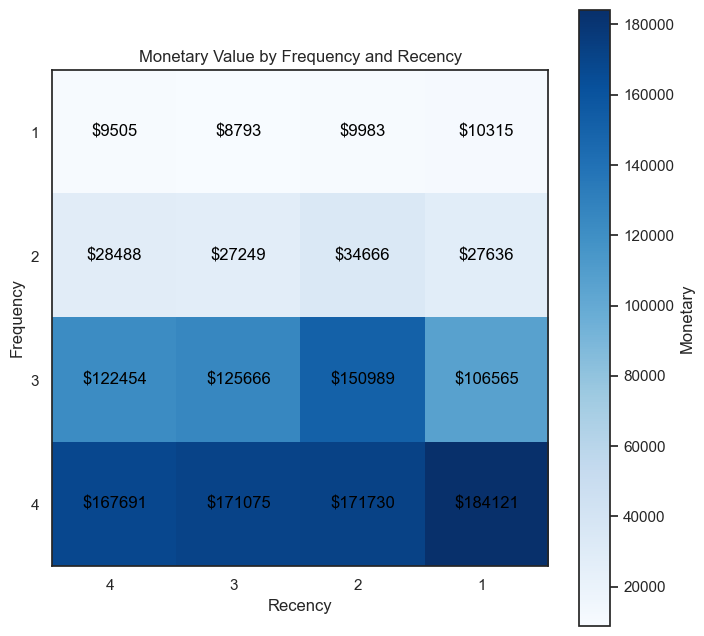

In [106]:
pivot_table = rfm_data.pivot_table(values='Monetary', index='Frequency_score', columns='Recency_score', aggfunc='sum')

fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(pivot_table, cmap='Blues')

ax.set_xticks(np.arange(len(pivot_table.columns)))
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticklabels(pivot_table.index)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')

cbar = plt.colorbar(heatmap)
cbar.set_label('Monetary')

plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        text = ax.text(j, i, f"${pivot_table.iloc[i, j]:.0f}",
                       ha="center", va="center", color="black")

# Set plot title
plt.title("Monetary Value by Frequency and Recency")

plt.show()


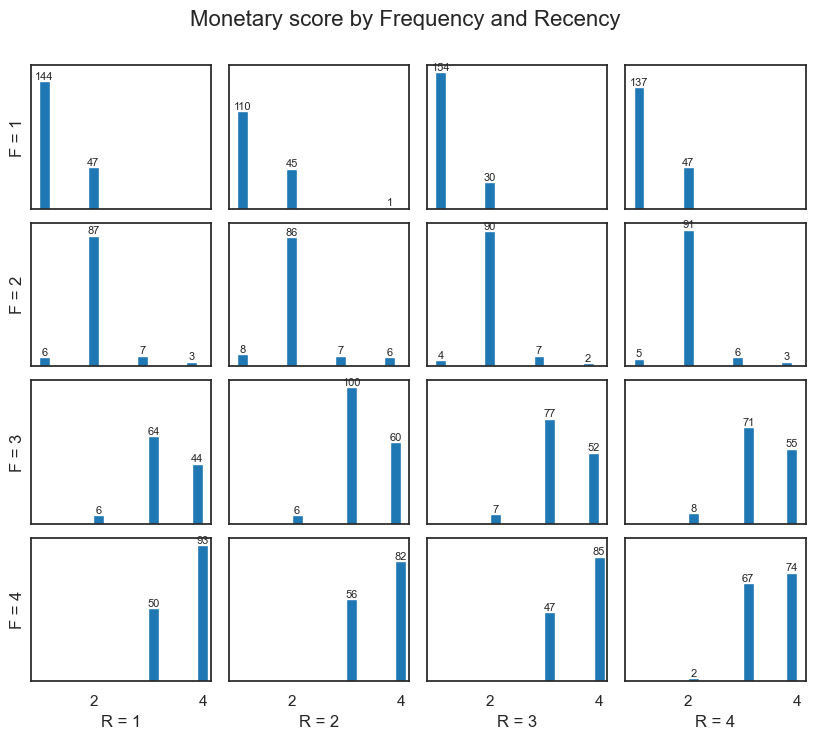

In [107]:
grouped_data = rfm_data.groupby(['Frequency_score', 'Recency_score'])['Monetary_score'].apply(list).reset_index()

matrix_size = 4
matrix = [[[] for _ in range(matrix_size)] for _ in range(matrix_size)]

# Fill the matrix with the Monetary_score scores for each Frequency_score x Recency_score pair
for _, row in grouped_data.iterrows():
    freq_idx = min(row['Frequency_score'] - 1, matrix_size - 1)
    rec_idx = min(row['Recency_score'] - 1, matrix_size - 1)
    matrix[freq_idx][rec_idx] = row['Monetary_score']

# Create the 5x5 matrix of histograms
_, axes = plt.subplots(matrix_size, matrix_size, figsize=(10, 8), sharex='col', sharey='row')

for i in range(matrix_size):
    for j in range(matrix_size):
        ax = axes[i, j]
        hist_values, hist_bins, _ = ax.hist(matrix[i][j], width=0.2)

        # Label for R and F
        if i == matrix_size - 1:
            ax.set_xlabel(f"R = {j + 1}")
        if j == 0:
            ax.set_ylabel(f"F = {i + 1}")

        # Do not set y ticks
        ax.set_yticks([])

        for value, bin in zip(hist_values, hist_bins):
            if value > 0:
                ax.text(bin + 0.1, value, str(int(value)), ha='center', va='bottom', fontsize=8)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.suptitle("Monetary score by Frequency and Recency", fontsize=16, y=0.95)
plt.show()

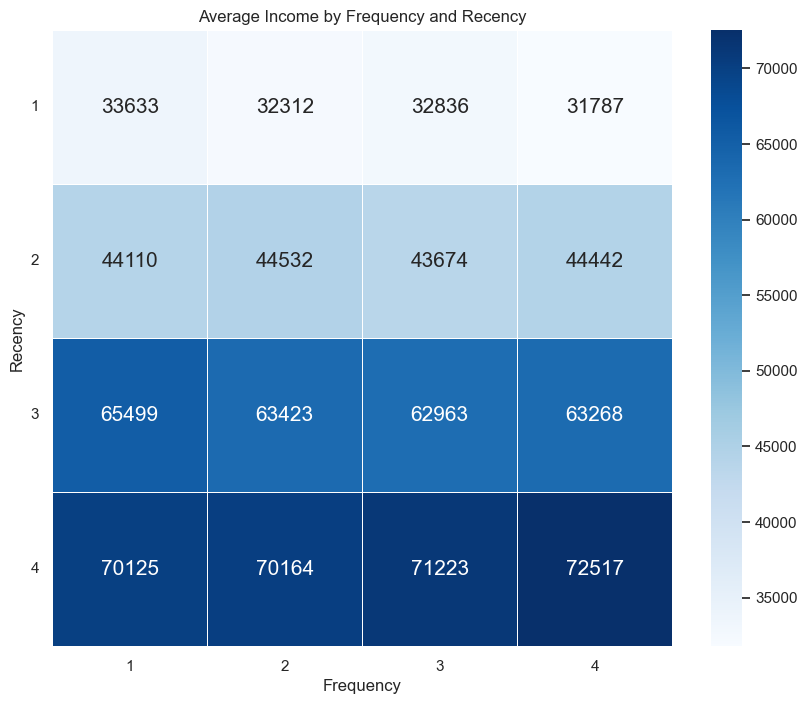

In [108]:
grouped_data = rfm_update_data.groupby(['Frequency_score', 'Recency_score'])['Income'].mean().unstack()
grouped_data = grouped_data.iloc[::, ::-1]
matrix_size = 4

_, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(grouped_data, annot=True, cmap="Blues", fmt='.0f', annot_kws={'fontsize': 15}, linewidths=0.5, ax=ax)

ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')

ax.set_xticklabels(range(1, 5), rotation=0)
ax.set_yticklabels(range(1, 5), rotation=0)

ax.set_title('Average Income by Frequency and Recency')

plt.show()


### Web view

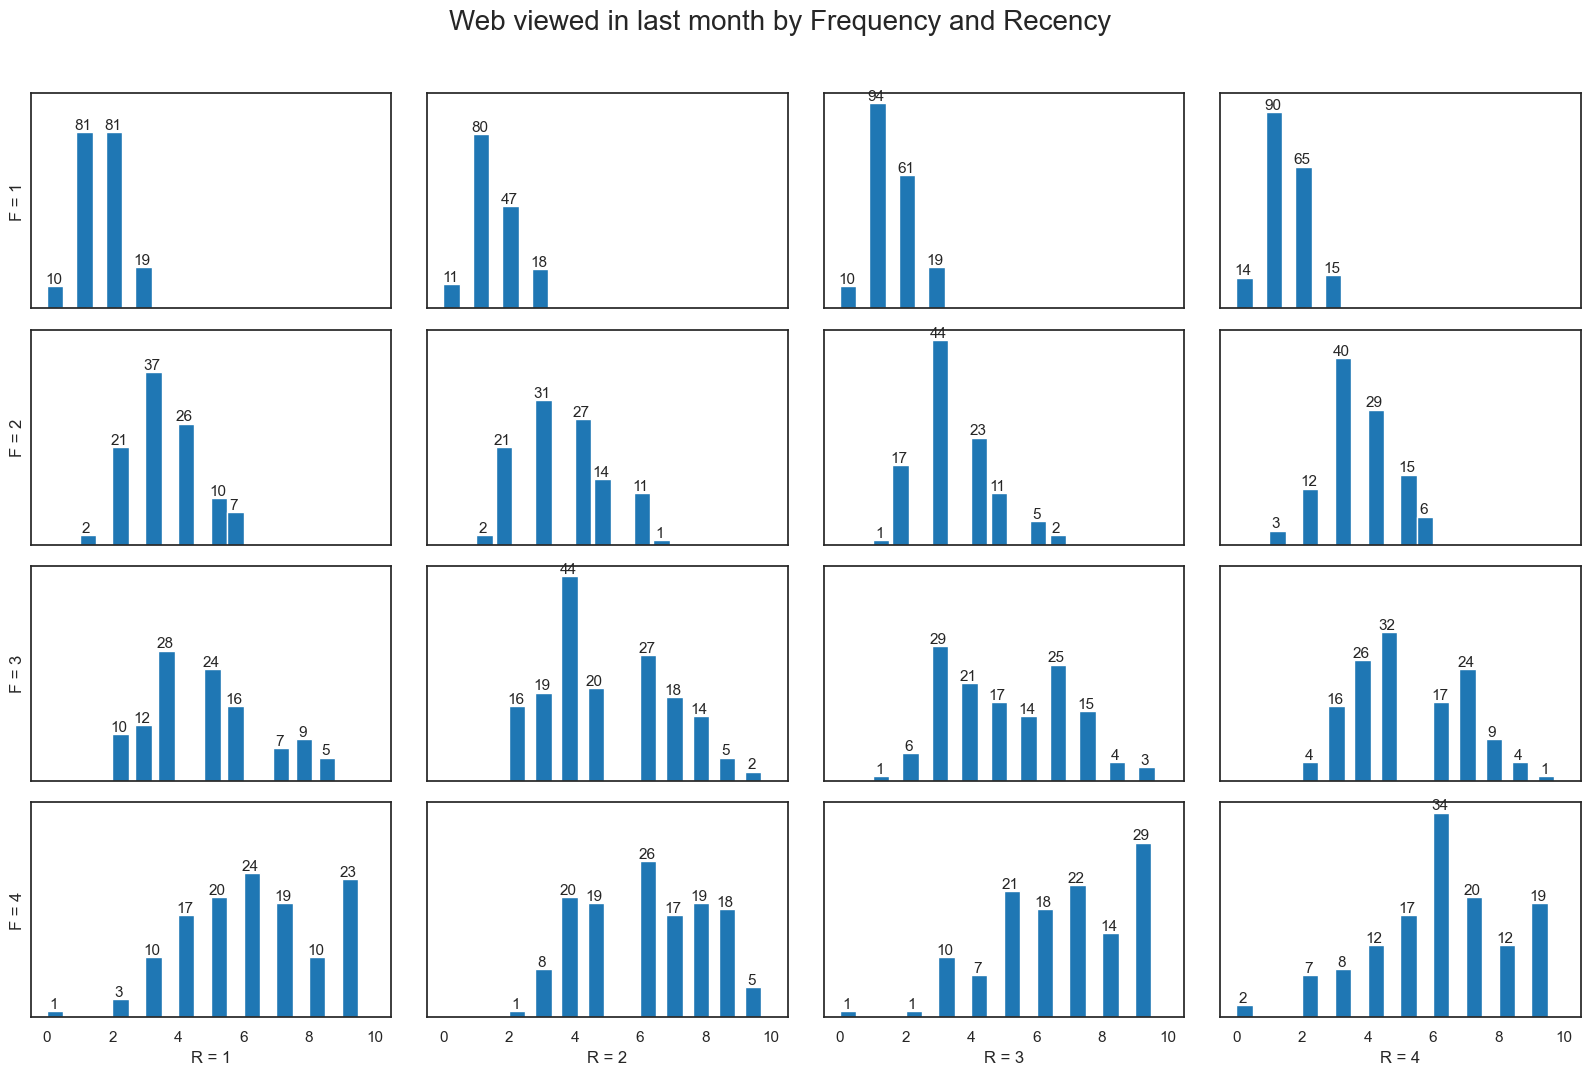

In [109]:
grouped_data = rfm_update_data[rfm_update_data['Web'] <= 10].groupby(['Frequency_score', 'Recency_score'])['Web'].apply(list).reset_index()

matrix_size = 4
matrix = [[[] for _ in range(matrix_size)] for _ in range(matrix_size)]

# Fill the matrix with the Web scores for each Frequency_score x Recency_score pair
for _, row in grouped_data.iterrows():
    freq_idx = min(row['Frequency_score'] - 1, matrix_size - 1)
    rec_idx = min(row['Recency_score'] - 1, matrix_size - 1)
    matrix[freq_idx][rec_idx] = row['Web']

# Create the 5x5 matrix of histograms
_, axes = plt.subplots(matrix_size, matrix_size, figsize=(20, 12), sharex='col', sharey='row')
sns.set(style="dark")

for i in range(matrix_size):
    for j in range(matrix_size):
        ax = axes[i, j]
        hist_values, hist_bins, _ = ax.hist(matrix[i][j], width=0.5)

        if i == matrix_size - 1:
            ax.set_xlabel(f"R = {j + 1}")
        if j == 0:
            ax.set_ylabel(f"F = {i + 1}")
        ax.set_yticks([])

        for value, bin in zip(hist_values, hist_bins):
            if value > 0:
                ax.text(bin + 0.2, value, str(int(value)), ha='center', va='bottom', fontsize=11)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.suptitle("Web viewed in last month by Frequency and Recency", fontsize=20, y=0.95)
plt.show()

### Complains

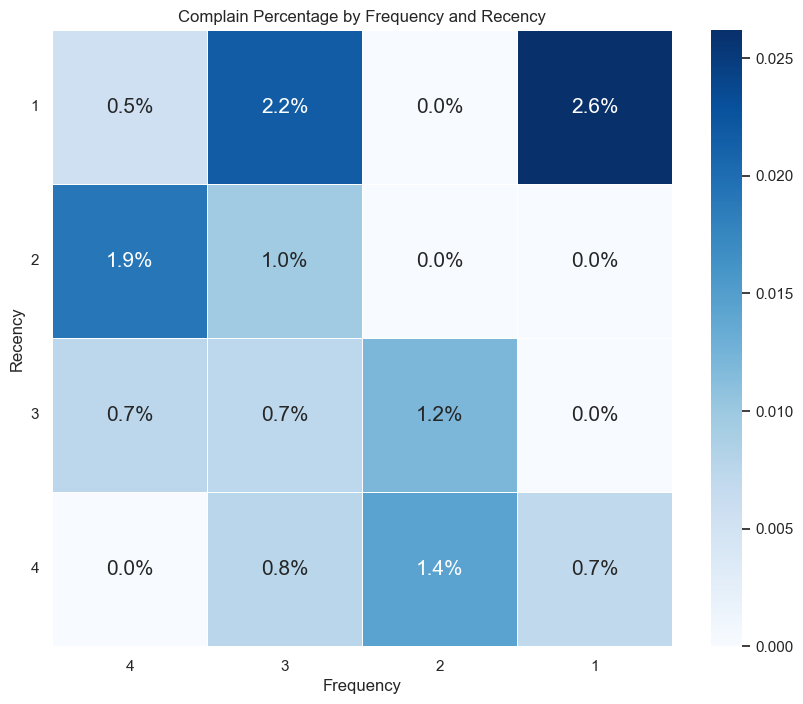

In [110]:
grouped_data = rfm_update_data.groupby(['Frequency_score', 'Recency_score'])['Complain'].mean().unstack()
matrix_size = 4
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(grouped_data, annot=True, cmap="Blues", fmt='.1%', annot_kws={'fontsize': 15}, linewidths=0.5, ax=ax)
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_xticklabels(range(4, 0, -1), rotation=0)
ax.set_yticklabels(range(1, 5), rotation=0)

ax.set_title('Complain Percentage by Frequency and Recency')
plt.show()

# Export to CSV

In [111]:
customer_data.to_csv("cleaned_data/final_customer_data.csv", index=False)
rfm_data.to_csv("cleaned_data/final_rfm_data.csv", index=False)
marketing_data.to_csv("cleaned_data/final_marketing_data.csv", index=False)
mc.to_csv("cleaned_data/marketing_customer_clean.csv", index=False)

# Profiling

In [112]:
profile = ProfileReport(mc, title="Profiling Report")
profile.to_file("charts/Profiling_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]